# Analysis on gun data | .xlsx

### Introduction

This analysis focuses on gun registrations using a dataset sourced from an Excel file. I uncovered insights into states with the highest growth in gun registrations and understanding the overarching trend in gun purchases over time.

### Questions
- <a href='#questionOne'>Find and visualize states with Highest Growth in Gun Registrations?</a>
- <a href='#questionTwo'>Find and visualize overall Trend of Gun Purchases?</a>

### Import packages

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Wrangling 

In [11]:
# load the data
gun_data = pd.read_excel('../dataset/gun_data.xlsx')
# shape of the data
gun_data.shape

(12485, 27)

### Data Cleaning (gun_data)

In [12]:
gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [13]:
gun_data.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [14]:
# Let us see if there is missing datas

for col in gun_data.columns:
    pct_missing = np.mean(gun_data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

month - 0%
state - 0%
permit - 0%
permit_recheck - 91%
handgun - 0%
long_gun - 0%
other - 56%
multiple - 0%
admin - 0%
prepawn_handgun - 16%
prepawn_long_gun - 16%
prepawn_other - 59%
redemption_handgun - 16%
redemption_long_gun - 16%
redemption_other - 59%
returned_handgun - 82%
returned_long_gun - 83%
returned_other - 85%
rentals_handgun - 92%
rentals_long_gun - 93%
private_sale_handgun - 78%
private_sale_long_gun - 78%
private_sale_other - 78%
return_to_seller_handgun - 80%
return_to_seller_long_gun - 78%
return_to_seller_other - 82%
totals - 0%


In [15]:
# remove null values from dataset
gun_data.dropna(inplace=True)

#  If a column has a high percentage of missing values and is not crucial for your analysis, we might consider dropping the entire column.
gun_data = gun_data.drop(['permit_recheck', 'other', 'prepawn_handgun',
       'prepawn_long_gun', 'prepawn_other', 'redemption_other', 'returned_handgun',
       'returned_long_gun', 'returned_other', 'rentals_handgun',
       'rentals_long_gun', 'private_sale_handgun',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_other'], axis = 1)

In [16]:
''' 
   I think the data haven cleaned. So, let us 
   confirm; there is no uncleared or missing data
'''
for col in gun_data.columns:
    pct_missing = np.mean(gun_data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

month - 0%
state - 0%
permit - 0%
handgun - 0%
long_gun - 0%
multiple - 0%
admin - 0%
redemption_handgun - 0%
redemption_long_gun - 0%
totals - 0%


<a id='questionOne'></a>

### Find and visualize states with Highest Growth in Gun Registrations?

<Figure size 1000x600 with 0 Axes>

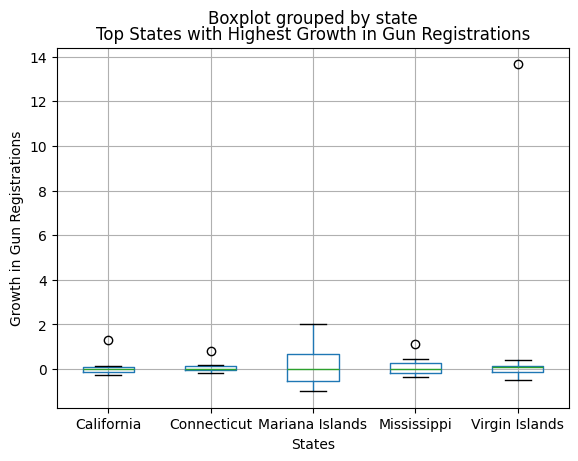

In [17]:
# Calculate growth in gun registrations
gun_data['growth_in_registrations'] = gun_data.groupby('state')['totals'].pct_change()

# Identify states with the highest growth
top_growth_states = gun_data.groupby('state')['growth_in_registrations'].mean().nlargest(5).index

# Visualize the top states with the highest growth
plt.figure(figsize=(10, 6))
gun_data[gun_data['state'].isin(top_growth_states)].boxplot(column='growth_in_registrations', by='state')
plt.title('Top States with Highest Growth in Gun Registrations')
plt.xlabel('States')
plt.ylabel('Growth in Gun Registrations')
plt.show()


<a id='questionTwo'></a>

### Find and visualize overall Trend of Gun Purchases?

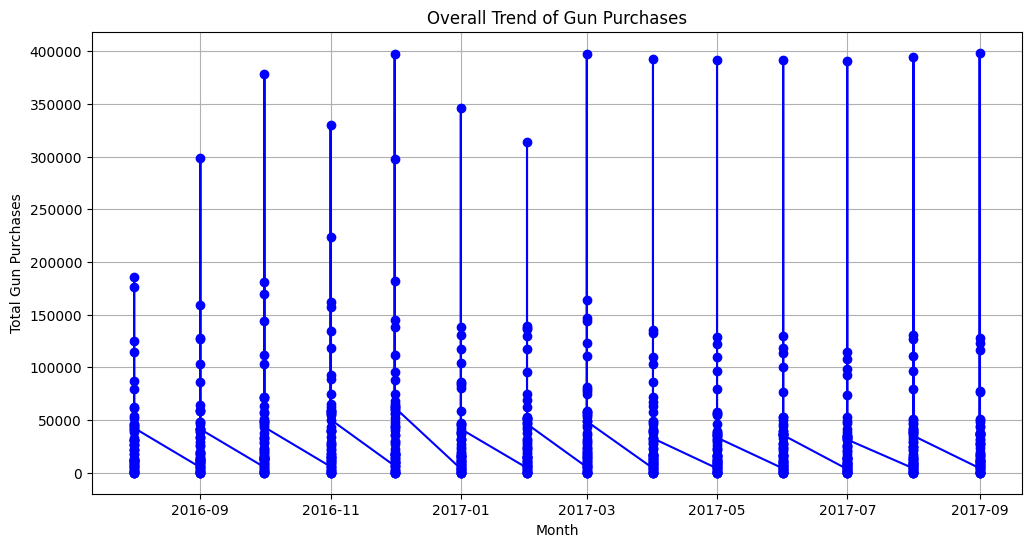

In [18]:
# Convert 'month' to datetime for better plotting
gun_data['month'] = pd.to_datetime(gun_data['month'])

# Explore overall trend of gun purchases
plt.figure(figsize=(12, 6))
plt.plot(gun_data['month'], gun_data['totals'], marker='o', linestyle='-', color='b')
plt.title('Overall Trend of Gun Purchases')
plt.xlabel('Month')
plt.ylabel('Total Gun Purchases')
plt.grid(True)
plt.show()


### Conclusion

In this analysis I leveraged data wrangling techniques, and prepared the dataset for exploration, addressing missing values and redundant columns. The investigation revealed top states with the highest growth in gun registrations. Finally I explored the overall trend in gun purchases and visualized through a compelling line chart.